<a href="https://colab.research.google.com/github/Aytsan11/AI-DL/blob/main/Text_%D0%9B%D0%A03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import plotly.graph_objs as go
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
df = pd.read_csv('/content/True.csv', quotechar='"', on_bad_lines='skip', encoding='utf-8')
df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
df['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [6]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [7]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re

lemmatizer = WordNetLemmatizer()

# Функция: сопоставление POS-тегов
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Основная функция лемматизации и очистки
def lemmatize_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)

    lemmas = [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in tagged
        if word.isalpha()]

    return ' '.join(lemmas)

df['norm_text'] = df['text'].fillna("").apply(lemmatize_text)

In [8]:
df['norm_text']

,norm_text
0,washington reuters the head of a conservative ...
1,washington reuters transgender people will be ...
2,washington reuters the special counsel investi...
3,washington reuters trump campaign adviser geor...
4,seattlewashington reuters president donald tru...
...,...
21412,brussels reuters nato ally on tuesday welcome ...
21413,london reuters lexisnexis a provider of legal ...
21414,minsk reuters in the shadow of disused soviete...
21415,moscow reuters vatican secretary of state card...


In [9]:
english_stopwords = stopwords.words("english")
vectorizer_tfidf = TfidfVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=english_stopwords, ngram_range=(1, 3))
text_tfidf = vectorizer_tfidf.fit_transform(df['norm_text'])
text_tfidf = pd.DataFrame(text_tfidf.toarray(),columns=vectorizer_tfidf.get_feature_names_out())
text_tfidf.head()

,accord,accuse,across,act,action,add,address,administration,adviser,agency,...,without,woman,work,worker,world,would,write,year,yet,york
0,0.000000,0.000000,0.0,0.0,0.039330,0.03196,0.0,0.066961,0.000000,0.000000,...,0.000000,0.0,0.030294,0.0,0.000000,0.061364,0.000000,0.069632,0.044792,0.000000
1,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.359184,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.131665,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.050770,0.0,0.0,0.000000,0.00000,0.0,0.085029,0.057861,0.000000,...,0.145983,0.0,0.000000,0.0,0.000000,0.025974,0.000000,0.029474,0.000000,0.100014
3,0.051055,0.062433,0.0,0.0,0.061415,0.00000,0.0,0.000000,0.071153,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.031941,0.000000,0.036245,0.000000,0.184484
4,0.135227,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.058555,...,0.000000,0.0,0.000000,0.0,0.030465,0.016920,0.035335,0.095999,0.000000,0.000000


In [10]:
features_tf = vectorizer_tfidf.get_feature_names_out()
ngram_df = pd.Series(features_tf)

bigrams_tf = ngram_df[ngram_df.str.count(" ") == 1]
trigrams_tf = ngram_df[ngram_df.str.count(" ") == 2]

print("Биграммы:")
print(bigrams_tf.head(10))

print("\nТриграммы:")
print(trigrams_tf.head(10))

Биграммы:
40             barack obama
123            donald trump
180         hillary clinton
184    house representative
187             human right
204           islamic state
219              last month
220               last week
221               last year
277       national security
dtype: object

Триграммы:
330    president donald trump
dtype: object


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=english_stopwords, ngram_range=(1, 3))
text_cv = vectorizer.fit_transform(df['norm_text'])
text_cv = pd.DataFrame(text_cv.toarray(),columns=vectorizer.get_feature_names_out())
text_cv.head()

,accord,accuse,across,act,action,add,address,administration,adviser,agency,...,without,woman,work,worker,world,would,write,year,yet,york
0,0,0,0,0,1,1,0,2,0,0,...,0,0,1,0,0,3,0,3,1,0
1,0,0,0,0,0,0,0,10,0,0,...,0,0,0,0,0,6,0,0,0,0
2,0,1,0,0,0,0,0,2,1,0,...,3,0,0,0,0,1,0,1,0,2
3,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,3
4,5,0,0,0,0,0,0,0,0,2,...,0,0,0,0,1,1,1,5,0,0


In [12]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [13]:
scal_X_tf = StandardScaler().fit_transform(text_tfidf)
scal_X_tf = pd.DataFrame(scal_X_tf, columns=text_tfidf.columns)

In [14]:
scal_X_cv = StandardScaler().fit_transform(text_cv)
scal_X_cv = pd.DataFrame(scal_X_cv, columns=text_cv.columns)

In [15]:
encoder = LabelEncoder() #кодируем каждую метку класса числом
y = encoder.fit_transform(df['subject'])
y = to_categorical(y)

In [16]:
y.shape[1]

2

In [31]:
X_train_full_tfidf,X_test_tfidf,y_train_full_tfidf,y_test_tfidf = train_test_split(text_tfidf,y,test_size=0.2,random_state=11)
X_train_tfidf,X_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(X_train_full_tfidf,y_train_full_tfidf,test_size=0.2,random_state=11)

In [32]:
model_tfidf = keras.models.Sequential()
model_tfidf.add(Dense(500, activation='relu', input_dim=X_train_tfidf .shape[1]))
model_tfidf.add(Dense(250, activation='relu'))
model_tfidf.add(Dense(50, activation='relu'))
model_tfidf.add(Dense(y.shape[1], activation='softmax'))

model_tfidf.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history_1 = model_tfidf.fit(X_train_tfidf, y_train_tfidf, epochs = 8, batch_size = 8,validation_data=(X_valid_tfidf,y_valid_tfidf))

acc=model_tfidf.evaluate(X_test_tfidf,y_test_tfidf)
print(np.array(acc)[1].round(2))

Epoch 1/8


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1714/1714 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9107 - loss: 0.2341 - val_accuracy: 0.9329 - val_loss: 0.1629
Epoch 2/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9458 - loss: 0.1299 - val_accuracy: 0.9373 - val_loss: 0.1563
Epoch 3/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9616 - loss: 0.0908 - val_accuracy: 0.9393 - val_loss: 0.1761
Epoch 4/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9759 - loss: 0.0602 - val_accuracy: 0.9338 - val_loss: 0.1856
Epoch 5/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9855 - loss: 0.0362 - val_accuracy: 0.9343 - val_loss: 0.2296
Epoch 6/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9871 - loss: 0.0316 - val_accuracy: 0.9308 - val_loss: 0.2613
Epoch 7/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9894 - loss: 0.0257 - val_accuracy: 0.9314 - val_loss: 0.3055
Epoch 8/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9881 - loss: 0.0259 - val_accura

In [33]:
X_train_full_cv,X_test_cv,y_train_full_cv,y_test_cv = train_test_split(scal_X_cv,y,test_size=0.2,random_state=11)
X_train_cv,X_valid_cv,y_train_cv,y_valid_cv = train_test_split(X_train_full_cv,y_train_full_cv,test_size=0.2,random_state=11)

In [34]:
model_cv = keras.models.Sequential()
model_cv.add(Dense(500, activation='relu', input_dim=X_train_cv.shape[1]))
model_cv.add(Dense(250, activation='relu'))
model_cv.add(Dense(50, activation='relu'))
model_cv.add(Dense(y.shape[1], activation='softmax'))

model_cv.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history_2 = model_cv.fit(X_train_cv, y_train_cv, epochs = 8,batch_size= 8,validation_data=(X_valid_cv,y_valid_cv))

acc=model_cv.evaluate(X_test_cv,y_test_cv)
print(np.array(acc)[1].round(2))

Epoch 1/8


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1714/1714 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8974 - loss: 0.2491 - val_accuracy: 0.9320 - val_loss: 0.1715
Epoch 2/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9431 - loss: 0.1420 - val_accuracy: 0.9373 - val_loss: 0.1699
Epoch 3/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9584 - loss: 0.1066 - val_accuracy: 0.9349 - val_loss: 0.1815
Epoch 4/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9633 - loss: 0.0913 - val_accuracy: 0.9323 - val_loss: 0.2463
Epoch 5/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9710 - loss: 0.0714 - val_accuracy: 0.9343 - val_loss: 0.2135
Epoch 6/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9764 - loss: 0.0558 - val_accuracy: 0.9279 - val_loss: 0.2434
Epoch 7/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9784 - loss: 0.0569 - val_accuracy: 0.9326 - val_loss: 0.2639
Epoch 8/8
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9811 - loss: 0.0460 - val_accura

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


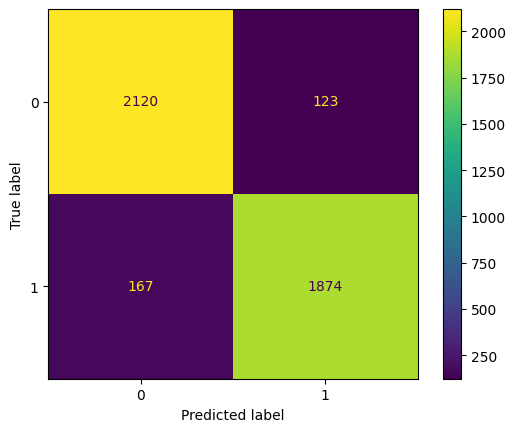

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2243
           1       0.94      0.92      0.93      2041

    accuracy                           0.93      4284
   macro avg       0.93      0.93      0.93      4284
weighted avg       0.93      0.93      0.93      4284



In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


y_pred_probs = model_tfidf.predict(X_test_tfidf)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_tfidf, axis=1)

#матрица путаницы
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_true, y_pred))

In [22]:
!pip install tensorflow

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['norm_text'])

X = tokenizer.texts_to_sequences(df['norm_text'])

vocab_size = len(tokenizer.word_index) + 1

In [25]:
vocab_size

69516

In [26]:
print(df['norm_text'][0])
print(X[0])

washington reuters the head of a conservative republican faction in the u congress who vote this month for a huge expansion of the national debt to pay for tax cut call himself a fiscal conservative on sunday and urge budget restraint in in keep with a sharp pivot under way among republican u representative mark meadow speak on cbs face the nation draw a hard line on federal spending which lawmaker be brace to do battle over in january when they return from the holiday on wednesday lawmaker will begin try to pass a federal budget in a fight likely to be link to other issue such a immigration policy even a the november congressional election campaign approach in which republican will seek to keep control of congress president donald trump and his republican want a big budget increase in military spending while democrat also want proportional increase for nondefense discretionary spending on program that support education scientific research infrastructure public health and environmental

In [27]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 250
X = pad_sequences(X, padding='post', maxlen=maxlen)

print(X[0, :])

[    5    43    33   125     9     2    59     3   147   679     2     1
    98   178     1    73     5    62   128    31     4   155     2   596
     3   304     6   709     3    38  2326   128    31   117    45  2927
     7     1    98    35  1198  3469   261     2   764   194  6755  8691
   217     6   437   584   145  1827     1   122     5     1  2615    48
   339  1687     2     1    55     3   432    16     7   808   283     3
   463 10219   991    10     1  4880   277    12  4013  1870    50  2293
   217    35   517     1   792   646    20  1764     6   305   138    14
   104  1656     1    29     9     8     7   362   449   658    15   139
   301    12    21   525   945   239   465     6    70   369    95   184
     7   823    12   337     2   161     1  2615   209  5838 27869    51
  3079    69    37    22   699   696    11   122     2    70   134  2646
   165     3   465   706    36   155     2    37  2293  1460    69     8
    10   121    16   648    31   229    14   466   

In [28]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

embedding_dim = 250

model_s = Sequential()
model_s.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim, input_shape=(maxlen,)))
model_s.add(layers.Flatten())
model_s.add(layers.Dense(50, activation='relu'))
model_s.add(layers.Dense(y.shape[1], activation='softmax'))

model_s.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

model_s.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 250, 250)            │      17,379,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 62500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 50)                  │       3,125,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,504,152 (78.22 MB)

 Trainable params: 20,504,152 (78.22 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
X_train_full_s,X_test_s,y_train_full_s,y_test_s = train_test_split(X,y,test_size=0.2,random_state=0)
X_train_s,X_valid_s,y_train_s,y_valid_s = train_test_split(X_train_full_s,y_train_full_s,test_size=0.2,random_state=11)

In [30]:
history_s = model_s.fit(X_train_s, y_train_s, epochs =3 ,batch_size=15 ,validation_data=(X_valid_s,y_valid_s))

acc=model_s.evaluate(X_test_s,y_test_s)
print(np.array(acc)[1].round(2))

Epoch 1/3
914/914 ━━━━━━━━━━━━━━━━━━━━ 314s 340ms/step - accuracy: 0.8652 - loss: 0.2770 - val_accuracy: 0.9551 - val_loss: 0.1269
Epoch 2/3
914/914 ━━━━━━━━━━━━━━━━━━━━ 310s 328ms/step - accuracy: 0.9949 - loss: 0.0175 - val_accuracy: 0.9539 - val_loss: 0.1404
Epoch 3/3
914/914 ━━━━━━━━━━━━━━━━━━━━ 310s 315ms/step - accuracy: 0.9975 - loss: 0.0131 - val_accuracy: 0.9495 - val_loss: 0.1616
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9580 - loss: 0.1446
0.96


In [35]:
y_pred_p = model_s.predict(X_test_s)
y_pred_s = np.argmax(y_pred_p, axis=1)
y_true_s = np.argmax(y_test_s, axis=1)

print(classification_report(y_true_s, y_pred_s))

134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2243
           1       0.96      0.96      0.96      2041

    accuracy                           0.96      4284
   macro avg       0.96      0.96      0.96      4284
weighted avg       0.96      0.96      0.96      4284

